<a href="https://colab.research.google.com/github/dinakaranadun/diabetes_prediction/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1

Random Forest is a popular and effective machine learning method that is well-suited for classification issues, such as predicting whether or not a patient is diabetic based on specific features . Here are a few reasons why the Random Forest classifier would be appropriate for the problem:

Handling Non-Linearity: Random Forest can capture complicated non-linear correlations between the input features and the target variable, which is useful for medical datasets with non-linear interactions.

It produces a feature importance score, which allows  to understand which features contribute the most to the prediction, which is useful in medical diagnosis to discover relevant diabetes-related areas.

Random Forest is an ensemble learning approach that mixes numerous decision trees. When compared to individual decision trees, this ensemble technique frequently leads in improved generalization and less overfitting.

It prevents overfitting by randomly picking subsets of features and data samples for each tree, making it less susceptible to noise and outliers in the data.

Random Forest often performs well on large datasets and is less susceptible to biases produced by an imbalanced dataset.

It is versatile in that it can handle both numerical and categorical information without considerable preprocessing.

--------------------------------------------------------------------------------

Checking For Null Values in  the data set

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
print(df.isnull().sum())


PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


Checking 0 Values in some Columns

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

columns_to_check = [col for col in df.columns if col not in ['PatientID', 'Pregnancies', 'Diabetic']]
zero_value_counts = df[columns_to_check].eq(0).sum()

print("Number of zero values in each column (excluding 'PatientID', 'Pregnancies', 'Diabetic'):")
print(zero_value_counts)

Number of zero values in each column (excluding 'PatientID', 'Pregnancies', 'Diabetic'):
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
dtype: int64


using correalation anlysis to  Identify a suitable feature set to model the classifier

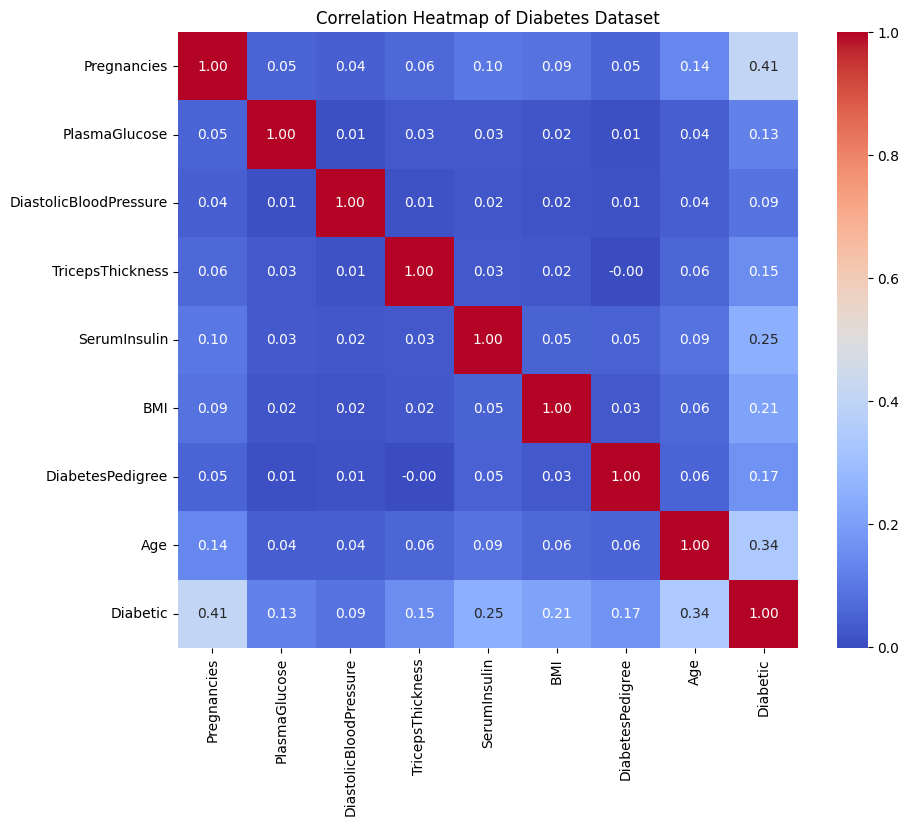

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('diabetes.csv')
df = df.drop('PatientID', axis=1)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()



Suitable Feature Set to  model the classifier



*   Pregnancies
*   Age
*   Serum Insulin
*   BMI
*   Diabetes Pedigree
*   Plasma Glucose












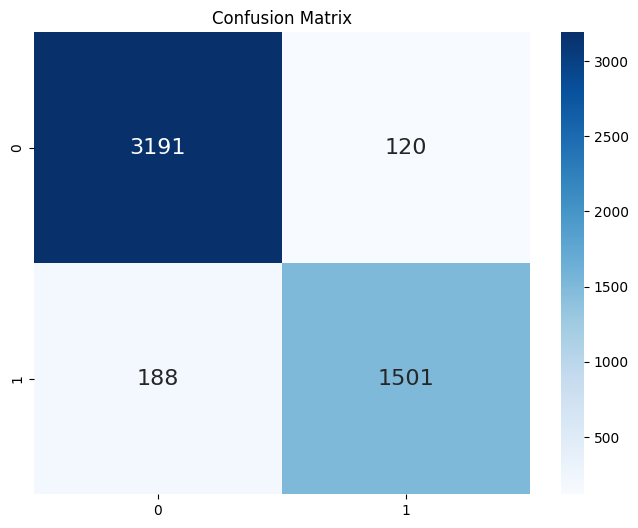

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes.csv')


features = ['Pregnancies', 'SerumInsulin','PlasmaGlucose', 'BMI', 'Age', 'DiabetesPedigree']

X = data[features]
y = data['Diabetic']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=40)

# Random Forest classifier with selected features
randomforest_classifier = RandomForestClassifier(n_estimators=300, random_state=40)
randomforest_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = randomforest_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.show()
